In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"vgsales.csv")

In [11]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Text(0.5, 1.0, 'Global Sales vs Year')

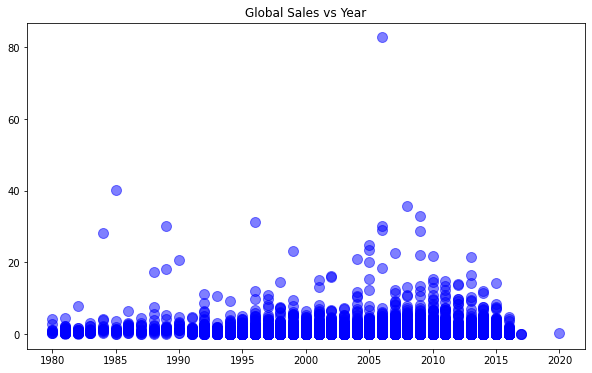

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Global_Sales'], s=100, c='b', alpha=0.5)
plt.title('Global Sales vs Year')

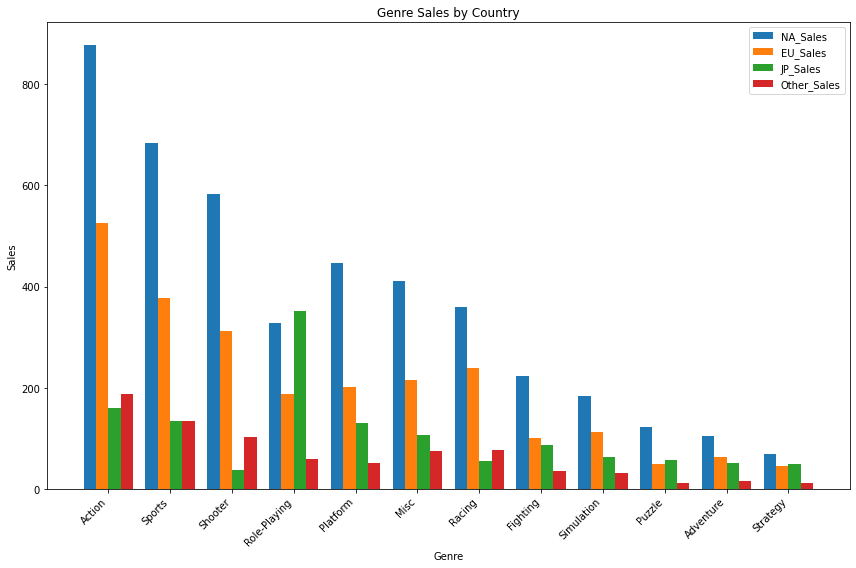

In [13]:
genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
genre_sales['Total_Sales'] = genre_sales.sum(axis=1)
genre_sales_sorted = genre_sales.sort_values(by='Total_Sales', ascending=False)
genres = genre_sales_sorted.index
num_countries = 4
bar_width = 0.2
index = np.arange(len(genres))
plt.figure(figsize=(12, 8))
for i, country in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']):
    plt.bar(index - 1.5 * bar_width + i * bar_width, genre_sales_sorted[country], bar_width, label=country)
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title('Genre Sales by Country')
plt.xticks(index, genres, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

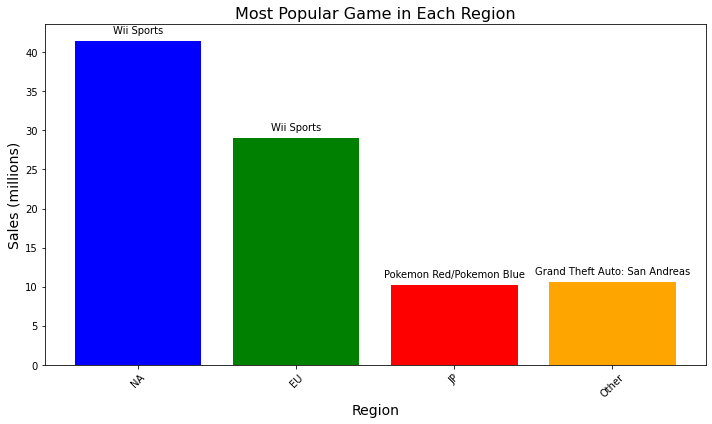

In [18]:
most_popular_na_index = df['NA_Sales'].idxmax()
most_popular_eu_index = df['EU_Sales'].idxmax()
most_popular_jp_index = df['JP_Sales'].idxmax()
most_popular_other_index = df['Other_Sales'].idxmax()

most_popular_na_sales = df.loc[most_popular_na_index, 'NA_Sales']
most_popular_eu_sales = df.loc[most_popular_eu_index, 'EU_Sales']
most_popular_jp_sales = df.loc[most_popular_jp_index, 'JP_Sales']
most_popular_other_sales = df.loc[most_popular_other_index, 'Other_Sales']

regions = ['NA', 'EU', 'JP', 'Other']
sales = [most_popular_na_sales, most_popular_eu_sales, most_popular_jp_sales, most_popular_other_sales]

plt.figure(figsize=(10, 6))
bars = plt.bar(regions, sales, color=['blue', 'green', 'red', 'orange'])
plt.title('Most Popular Game in Each Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Sales (millions)', fontsize=14)
for bar, game in zip(bars, games):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, game, ha='center', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

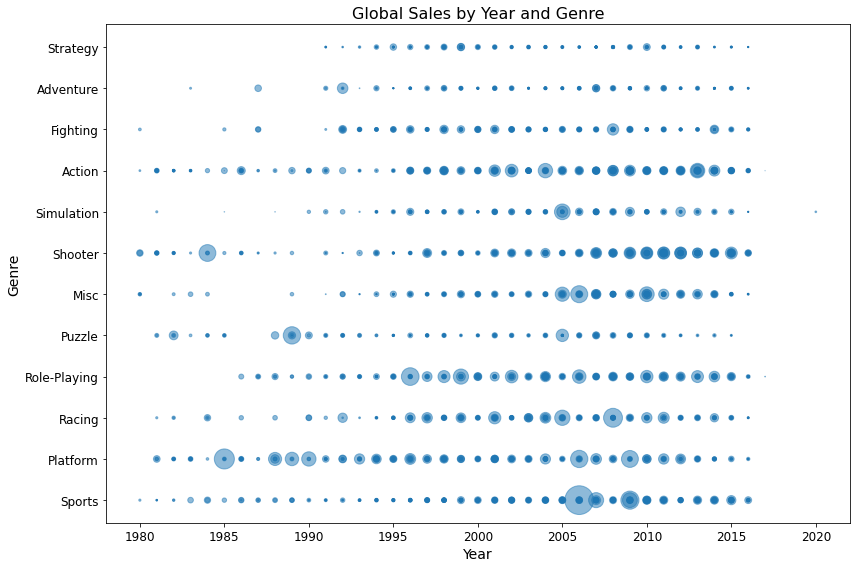

In [19]:
years = df['Year']
genres = df['Genre']
global_sales = df['Global_Sales']
plt.figure(figsize=(12, 8))
plt.scatter(years, genres, s=global_sales*10, alpha=0.5)
plt.title('Global Sales by Year and Genre', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()